# Christopher Scholz
# DSE 207R FINAL PROJECT
## Fall 2023
### Due Date:  December 12th, 2023

The final project is a guided project for you to build your own end-to-end analysis using Python, especially using what you learned on Python _numpy_, _pandas_, _matplotlib_/_seaborn_ and _scilitlearn_ libraries.

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting. Make sure to follow Slack for any updates on the final project.

# <b>Deliverables</b>:
The final project has 2 submissions - a report(this notebook) and an presentation video(self recorded). You will be evaluated on both the components.

## 1. Report (this notebook)
Submit the notebook via Gradescope by midnight on the due date above along with clear instructions on how to download the datasets you used for and reproduce your results. You can host the dataset(on github) such that it can be used as a url directly. Don't forget to add your name on top as the author of the notebook.



There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.

### Step 1: Find a dataset or datasets

1.1. **Based on your interest, identify a dataset which you will want to examine.**  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about.


This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask.

Below are some resources but you are not limited to them -

UCI's Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php <br>
Kaggle: https://www.kaggle.com/datasets <br>
KDnuggets Dataset: http://www.kdnuggets.com/datasets/index.html <br>
government data (http://www.kdnuggets.com/datasets/government-local-public.html) <br>
Data APIs (http://www.kdnuggets.com/datasets/api-hub-marketplace-platform.html <br>
Data Mining Competitions (http://www.kdnuggets.com/competitions/index.html <br>
US Government Data: https://www.data.gov/ <br>
UK Government Data: https://data.gov.uk/ <br>
Canada's Open Data Exchange: https://codx.ca/ <br>
World Health Organization: http://www.who.int/gho/en <br>
World Bank: http://data.worldbank.org/ <br>

Remember! Finding a dataset of interest and exploring it is most of your job for your final project. So expect this to take some time - and that's both perfectly normal and completely okay. Get started early and make sure to check if the dataset you find satisfies the project requirements.
<br>

<br>

1.2. **Once selected, explain the choice of dataset and why you want to work with it.**

In [398]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [272]:
#EXPLAIN AND INGEST YOUR DATASET IN THIS SECTION

## Initial Data Sourcing and Ingestion
Our analysis will be based on financial institution (FI) data. Namely, the financial data and metrics related to banks, credit unions, and savings banks in the US. A wealth of FI data is publicly available through the governmental entities that regulate and monitor FIs. For this exercise, we will be sourcing data from the National Credit Union Administration (NCUA) for credit unions, and the Federal Deposit Insurance Corporation (FDIC) for banks and savings banks.

We chose this dataset because economics data, information, and insights is of significant interest to me. I love diving into and understanding the details of our national and worldwide economy. In the arena of economics, what better place to run a detailed data science showcase than the financial institutions that underpin our economic system. Fortunately, myriad of data in this area is available publicly due to our regulatory systems and processes.

For the NCUA data, we sourced this via a download of a text repository of credit union call report data for a given time period - in this case year-to-date 9/30/23. This can be found at the below URL:
* https://ncua.gov/analysis/credit-union-corporate-call-report-data/quarterly-data

For the FDIC data, we sourced this via interfacing with the FDIC data API, which is done via a custom URL string. While we construct our custom URL string in this notebook, the instructions for accessing the API can be found at the below URL:
* https://banks.data.fdic.gov/docs/All%20Financial%20Reports.xlsx

Or, both datasets, and a copy of this notebook, can be referenced at my github via the below URL:
* A

### NCUA Data
After retrieving the NCUA call report data repository for the given month, there is much to do to pre-process the data. We'll need to identify which fields we want to source and determine which tables they need to be sourced from. Then we need to retrieve said fields from the related tables. Lastly, we will merge all of the sourced data into a single NCUA dataframe.

In [273]:
#Import NCUA field descriptions and table locations
NCUAdesc = pd.read_csv('call-report-data-2023-09\AcctDesc.txt')
NCUAdesc

,Account,AcctName,AcctDesc,TableName,Annualize,CBSAccount,FPRAccount,STATAcctMain,STATAcctState,STATAcctGraph,STATAcctTable8,STATUS
0,Acct_001,Amount - Total Other Loans (Purchased or to no...,Include the dollar amount of outstanding loans...,FS220A,False,True,True,True,True,False,False,Inactive
1,Acct_002,Amount of Leases Receivable,"Leases Receivable. Include the rate, number, a...",FS220A,False,False,False,False,False,False,False,Active
2,Acct_003,Loans Held for Sale,Loans Held for Sale. Report the amount of outs...,FS220C,False,False,False,False,False,False,False,Active
3,Acct_007,Land and Building,"Land and building, less depreciation on buildi...",FS220,False,True,True,True,True,False,True,Active
4,Acct_008,Other Fixed Assets,All other fixed assets such as furniture and f...,FS220,False,True,True,True,True,False,True,Active
...,...,...,...,...,...,...,...,...,...,...,...,...
3328,President_F,President of the Board First Name,First Name of board chairperson.,FS220D,False,False,False,False,False,False,False,Active
3329,President_M,President of the Board Middle Initial,Middle Initial of board chairperson.,FS220D,False,False,False,False,False,False,False,Active
3330,Principal,Principal Last Name,The last name person responsible for the day t...,FS220D,False,False,False,False,False,False,False,Inactive
3331,Principal_F,Principal Last Name,The first name person responsible for the day ...,FS220D,False,False,False,False,False,False,False,Inactive


In [274]:
#Create list of NCUA accounts of interest for analysis - based on review of call report sample
NCUAIntAcctsList = ['ACCT_AS0009', 'ACCT_AS0013', 'Acct_025B', 'Acct_010', 'Acct_LI0069', 'Acct_014', 'Acct_115', 'ACCT_IS0010', 'Acct_117', 'Acct_671',
 'Acct_661A', 'Acct_083', 'Acct_452', 'Acct_454', 'Acct_460', 'Acct_564A']

#Use list of accounts of interest to create master dataframe of accounts for analysis by referencing against the full NCUA account list
#Create custom 'account key' field that will match with fields in needed data tables
NCUAIntAccts = pd.DataFrame(NCUAIntAcctsList)
NCUAIntAccts = NCUAIntAccts.rename(columns = {0 : 'AcctsOfInterest'})
NCUAIntAccts = NCUAIntAccts.merge(NCUAdesc, how = 'left', left_on = 'AcctsOfInterest', right_on = 'Account')
NCUAIntAccts = NCUAIntAccts.drop(columns = ['Annualize', 'CBSAccount', 'FPRAccount', 'STATAcctMain', 'STATAcctState', 'STATAcctGraph', 'STATAcctTable8'])
NCUAIntAccts['AccountKey'] = NCUAIntAccts['Account'].str.replace('Acct', 'ACCT')
NCUAIntAccts['AccountKey'] = NCUAIntAccts['AccountKey'].str.replace('ACCT_661A', 'Acct_661A')
NCUAIntAccts

,AcctsOfInterest,Account,AcctName,AcctDesc,TableName,STATUS,AccountKey
0,ACCT_AS0009,ACCT_AS0009,Total Cash and Other Deposits,Total Cash and Other Deposits,FS220P,Active,ACCT_AS0009
1,ACCT_AS0013,ACCT_AS0013,Total Investment Securities,Total Investment Securities,FS220P,Active,ACCT_AS0013
2,Acct_025B,Acct_025B,Total amount of Loans and Leases,Total amount of Loans and Leases,FS220,Active,ACCT_025B
3,Acct_010,Acct_010,TOTAL ASSETS,TOTAL ASSETS,FS220,Active,ACCT_010
4,Acct_LI0069,Acct_LI0069,Total Liabilities,Total Liabilities,FS220N,Active,ACCT_LI0069
5,Acct_014,Acct_014,"TOTAL LIABILITIES, SHARES, AND EQUITY","TOTAL LIABILITIES, SHARES, AND EQUITY",FS220A,Active,ACCT_014
6,Acct_115,Acct_115,Total Interest Income,Total Interest Income,FS220A,Active,ACCT_115
7,ACCT_IS0010,ACCT_IS0010,Net Interest Income,Net Interest Income,FS220P,Active,ACCT_IS0010
8,Acct_117,Acct_117,Total Non-Interest Income,Total Non-Interest Income,FS220A,Active,ACCT_117
9,Acct_671,Acct_671,Total Non-Interest Expense (Sum of items 18-27),Sum of all operating expenses.,FS220,Active,ACCT_671


In [275]:
#Summarize data tables needed
NCUATablesNeeded = pd.unique(NCUAIntAccts.TableName).tolist()
NCUATablesNeeded

['FS220P', 'FS220', 'FS220N', 'FS220A']

In [276]:
#Create account lists for each queried table
FS220PAccts = NCUAIntAccts[NCUAIntAccts.TableName == 'FS220P']['AccountKey'].tolist()
FS220PAccts.append('CU_NUMBER')

FS220Accts = NCUAIntAccts[NCUAIntAccts.TableName == 'FS220']['AccountKey'].tolist()
FS220Accts.append('CU_NUMBER')

FS220NAccts = NCUAIntAccts[NCUAIntAccts.TableName == 'FS220N']['AccountKey'].tolist()
FS220NAccts.append('CU_Number')

FS220AAccts = NCUAIntAccts[NCUAIntAccts.TableName == 'FS220A']['AccountKey'].tolist()
FS220AAccts.append('CU_NUMBER')

FS220Accts

['ACCT_025B', 'ACCT_010', 'ACCT_671', 'ACCT_083', 'CU_NUMBER']

In [277]:
#Import required data tables, remove unused columns, and merge tables.
#Also import the 'FOICU' table, which will provide institution name data
FS220P = pd.read_csv('call-report-data-2023-09\FS220P.txt')
FS220 = pd.read_csv('call-report-data-2023-09\FS220.txt')
FS220N = pd.read_csv('call-report-data-2023-09\FS220N.txt')
FS220A = pd.read_csv('call-report-data-2023-09\FS220A.txt')
FOICU = pd.read_csv('call-report-data-2023-09\FOICU.txt')

FS220P = FS220P[FS220PAccts]
FS220 = FS220[FS220Accts]
FS220N = FS220N[FS220NAccts]
FS220A = FS220A[FS220AAccts]
FOICU = FOICU[['CU_NUMBER', 'CYCLE_DATE', 'CU_TYPE', 'CU_NAME']]

NCUARawData = FOICU.merge(FS220P, how = 'left', left_on = 'CU_NUMBER', right_on = 'CU_NUMBER')
NCUARawData = NCUARawData.merge(FS220, how = 'left', left_on = 'CU_NUMBER', right_on = 'CU_NUMBER')
NCUARawData = NCUARawData.merge(FS220N, how = 'left', left_on = 'CU_NUMBER', right_on = 'CU_Number')
NCUARawData = NCUARawData.merge(FS220A, how = 'left', left_on = 'CU_NUMBER', right_on = 'CU_NUMBER')
NCUARawData = NCUARawData.drop(columns = 'CU_Number')
NCUARawData

,CU_NUMBER,CYCLE_DATE,CU_TYPE,CU_NAME,ACCT_AS0009,ACCT_AS0013,ACCT_IS0010,ACCT_025B,ACCT_010,ACCT_671,ACCT_083,ACCT_LI0069,ACCT_014,ACCT_115,ACCT_117,Acct_661A,ACCT_452,ACCT_454,ACCT_460,ACCT_564A
0,1,9/30/2023 0:00:00,1,MORRIS SHEPPARD TEXARKANA,1715658,0,316351,9432171,11282156,295644,1285,10019572,11282156,390217,67667,58182,311,1285,1755,3
1,6,9/30/2023 0:00:00,1,THE NEW ORLEANS FIREMEN'S,14268467,35223219,8822834,192894777,255590535,10395196,28916,236921535,255590535,9724144,3681733,863731,14345,33765,67765,97
2,12,9/30/2023 0:00:00,1,FRANKLIN TRUST,15700470,6681870,2156543,26591961,57781934,3376789,9177,53411085,57781934,2317424,1834585,244927,6182,15089,22564,27
3,13,9/30/2023 0:00:00,1,EFCU FINANCIAL,59070389,380757,16963289,885479206,975485736,16324905,63916,894954959,975485736,31449789,8413175,8130250,31824,69948,111297,128
4,16,9/30/2023 0:00:00,1,WOODMEN,5953897,0,246922,3504980,9583258,261858,907,8311277,9583258,256804,48137,33201,340,908,1296,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740,97108,9/30/2023 0:00:00,3,NORTHWEST COMMUNITY,12488277,9269021,1080671,43387045,67801983,1224769,2726,62564708,67801983,1817717,353605,194407,846,2985,4754,7
4741,97109,9/30/2023 0:00:00,3,RIVER VALLEY,23358734,40325023,10595029,365930280,447607570,10060443,26301,405975134,447607570,14508218,3497331,2966917,13327,32192,51453,87
4742,97110,9/30/2023 0:00:00,3,ROCKY MOUNTAIN,35502511,32059896,8101431,287633753,383912495,10254077,24967,355352167,383912495,11935374,3607137,1063491,14714,25505,50138,76
4743,97111,9/30/2023 0:00:00,3,ABBEY,13059114,13309565,4000870,113840295,150203739,3999690,12325,142098091,150203739,4943687,1240547,874728,7202,14192,23445,36


### FDIC Data
While the initial step of working through the FDIC API URL is more complex than downloading the NCUA csv repository, once we retrieve the data needed from the FDIC API the process is much simpler. We'll start here by again identifying the fields we want to source, and then we'll build the API URL to query those fields from the FDIC API. Once that's done, we'll import the downloaded csv into a dataframe.

In [278]:
#Import FDIC field descriptors and API instructions
FDICdesc = pd.read_excel(open('FDIC data\All Financial Reports.xlsx', 'rb'), sheet_name = 'Reference-Variables&Definitions')
FDICdesc

,Variable,Title,Definition
0,ABCUBKR,Unused Commitments To Provide Liquidity To Con...,"( YTD, % ) Conduits Sponsored by the Bank - Un..."
1,ABCUOTH,"Unused Commitments To Provide Liquidity, Unrel...","( YTD, $ ) Conduits Sponsored by Other Unrelat..."
2,ABCUOTHR,"Unused Commitments To Provide Liquidity, Unrel...","( YTD, % ) Conduits Sponsored by Other Unrelat..."
3,ABCXBK,Maximum Credit Exposure Asset-Backed Commercia...,"( YTD, $ ) Conduits Sponsored by the Bank Maxi..."
4,ABCXBKR,Maximum Credit Exposure Asset-Backed Commercia...,"( YTD, % ) Conduits Sponsored by the Bank Maxi..."
...,...,...,...
2328,UNINUM,FDIC's unique number,A unique number for the bank or savings instit...
2329,VOLIAB,Volatile Liabilities,"( YTD, $ ) Volatile liabilities on a consolida..."
2330,VOLIABR,Volatile Liabilities,"( YTD, % ) Volatile liabilities on a consolida..."
2331,WEBADDR,Primary Internet Web Address,The primary internet web address is the public...


In [279]:
FDICIntAcctsList = ['BKCLASS', 'CERT', 'NAMEFULL', 'REPDTE', 'CHBAL', 'SC', 'LNLSNET', 'ASSET', 'LIAB', 'LIABEQ', 'INTINC', 'NIM', 'NONII', 'NONIX', 'NETINC', 'DEPLGB', 'DEPSMB', 'NUMEMP']
FDICIntAccts = pd.DataFrame(FDICIntAcctsList)
FDICIntAccts = FDICIntAccts.rename(columns = {0 : 'AcctsOfInterest'})
FDICIntAccts = FDICIntAccts.merge(FDICdesc, how = 'left', left_on = 'AcctsOfInterest', right_on = 'Variable')
FDICIntAccts

,AcctsOfInterest,Variable,Title,Definition
0,BKCLASS,BKCLASS,Institution Class,A classification code assigned by the FDIC bas...
1,CERT,CERT,FDIC Certificate #,A unique number assigned by the FDIC used to i...
2,NAMEFULL,NAMEFULL,Institution Name at Time of Reporting,Institution Name at Time of Reporting
3,REPDTE,REPDTE,Report Date,The last day of the financial reporting period...
4,CHBAL,CHBAL,Cash and Balances due from Depository Institut...,"( YTD, $ ) Total cash and balances due from de..."
5,SC,SC,Total Securities,"( YTD, $ ) Total rsecurities: the sum of held-..."
6,LNLSNET,LNLSNET,Net Loans and Leases,"( YTD, $ ) Net Loans and Leases"
7,ASSET,ASSET,Total Assets,"( YTD, $ ) The sum of all assets owned by the ..."
8,LIAB,LIAB,Total Liabilities,"( YTD, $ ) Deposits and other borrowings, subo..."
9,LIABEQ,LIABEQ,Total Liabilities & Capital,"( YTD, $ ) Total liabilities, limited-life pre..."


In [280]:
#Write URL API string to query desired data from FDIC website
FDICAPIScript = str('https://banks.data.fdic.gov/api/financials?filters=ACTIVE%3A1%20AND%20%21%28BKCLASS%3ANC%29%20AND%20REPDTE%3A20230930&fields=')

for Acct in FDICIntAcctsList:
    FDICAPIScript = str(FDICAPIScript + Acct + '%2C')

FDICAPIScript = FDICAPIScript[: - 3]

FDICAPIScript = str(FDICAPIScript + '&sort_by=REPDTE&sort_order=DESC&limit=10000&offset=0&format=csv&download=true&filename=data_file')

FDICAPIScript

'https://banks.data.fdic.gov/api/financials?filters=ACTIVE%3A1%20AND%20%21%28BKCLASS%3ANC%29%20AND%20REPDTE%3A20230930&fields=BKCLASS%2CCERT%2CNAMEFULL%2CREPDTE%2CCHBAL%2CSC%2CLNLSNET%2CASSET%2CLIAB%2CLIABEQ%2CINTINC%2CNIM%2CNONII%2CNONIX%2CNETINC%2CDEPLGB%2CDEPSMB%2CNUMEMP&sort_by=REPDTE&sort_order=DESC&limit=10000&offset=0&format=csv&download=true&filename=data_file'

Note - while we could simply plug the above constructed URL into a pandas dataframe constructor and source the data directly, for the purposes of this exercise we will download the csv using the URL and import via flat file.

In [281]:
#Import downloaded FDIC dataset
FDICRawData = pd.read_csv('FDIC data\data_file.csv')
FDICRawData

,ASSET,BKCLASS,CERT,CHBAL,DEPLGB,DEPSMB,ID,INTINC,LIAB,LIABEQ,LNLSNET,NAMEFULL,NETINC,NIM,NONII,NONIX,NUMEMP,REPDTE,SC
0,223315,NM,10004,5002,15,11211.0,10004_20230930,7250.0,202281,223315,190110,ERGO BANK,1194.0,5076.0,593.0,4027.0,33.0,20230930,16107
1,418692,NM,10011,9679,160,16672.0,10011_20230930,12978.0,402292,418692,294148,WOODFORD STATE BANK,2455.0,9235.0,1037.0,7702.0,77.0,20230930,91376
2,214486,NM,10012,33486,100,7182.0,10012_20230930,6045.0,193407,214486,114434,THE PORTAGE COUNTY BANK,657.0,4183.0,533.0,3985.0,37.0,20230930,60523
3,167589,NM,10015,3633,72,6384.0,10015_20230930,6537.0,146500,167589,146641,SECURITY BANK,1493.0,4572.0,537.0,2916.0,22.0,20230930,6949
4,2692427,N,10044,199829,848,80358.0,10044_20230930,97281.0,2272583,2692427,1616401,NATIONAL EXCHANGE BANK AND TRUST,30377.0,70852.0,10288.0,39451.0,366.0,20230930,745950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4618,84021,SM,9986,4623,24,4554.0,9986_20230930,2487.0,69588,84021,42618,FARMERS & MERCHANTS BANK OF CRAIG COUNTY,899.0,2242.0,138.0,1287.0,14.0,20230930,31784
4619,498448,NM,9997,13665,153,17198.0,9997_20230930,13782.0,475547,498448,341968,JEFFERSON SECURITY BANK,2333.0,9194.0,1688.0,7929.0,70.0,20230930,117795
4620,212867,NM,9998,19136,80,11240.0,9998_20230930,7020.0,195343,212867,143172,CAPON VALLEY BANK,777.0,5464.0,967.0,5199.0,46.0,20230930,37585
4621,124133,SM,999,56984,81,4193.0,999_20230930,3031.0,116159,124133,24332,G. W. JONES EXCHANGE BANK,1126.0,2547.0,1139.0,2450.0,20.0,20230930,40940


### Step 2: Explore the datasets

In this step, you should explore what is present in the data and how the data is organized.

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)?
* What will you need to do to clean and/or transform the raw data for analysis?

You can also visually explore the datasets and explain your findings, specifically,

* How are the data distributed?
* What are some common trends?
* What are the relationships between variables in your dataset?

In [282]:
#PERFORM AND EXPLAIN YOUR EXPLORATORY ANALYSIS IN THIS SECTION

## Data Transformation and Exploration

### NCUA Data Transformation
Next up is transforming our sourced NCUA dataset. We need to standardize field names and number amounts before combining with the FDIC data.

In [283]:
NCUAIntAccts['AccountKey'].to_list()

['ACCT_AS0009',
 'ACCT_AS0013',
 'ACCT_025B',
 'ACCT_010',
 'ACCT_LI0069',
 'ACCT_014',
 'ACCT_115',
 'ACCT_IS0010',
 'ACCT_117',
 'ACCT_671',
 'Acct_661A',
 'ACCT_083',
 'ACCT_452',
 'ACCT_454',
 'ACCT_460',
 'ACCT_564A']

In [284]:
#Rename and standardize column names
NCUARevData = NCUARawData.rename(columns = {
    'ACCT_AS0009' : 'Cash & Deposits',
 'ACCT_AS0013' : 'Investments',
 'ACCT_025B' : 'Loans & Leases',
 'ACCT_010' : 'Assets',
 'ACCT_LI0069' : 'Liabilities',
 'ACCT_014' : 'Liabilities & Equity',
 'ACCT_115' : 'Interest Income',
 'ACCT_IS0010' : 'Net Interest Income',
 'ACCT_117' : 'Non-Interest Income',
 'ACCT_671' : 'Non-Interest Expense',
 'Acct_661A' : 'Net Income',
 'ACCT_083' : 'Members',
 'ACCT_452' : 'Share Draft Accounts',
 'ACCT_454' : 'Regular Share Accounts',
 'ACCT_460' : 'Deposit Accounts',
 'ACCT_564A' : 'Employees',
 'CU_NUMBER' : 'Charter/Cert',
 'CYCLE_DATE' : 'Report Date',
 'CU_TYPE' : 'Inst Type Code',
 'CU_NAME' : 'Inst Name'})

#Add a column to specify between credit union, bank, savings bank. For use in merged table.
NCUARevData['Inst Type'] = 'Credit Union'

#Combine Inst Type with Charter/Cert to create a true unique identifier. For use in merged table.
NCUARevData['Charter/Cert'] = NCUARevData['Inst Type'].astype(str) + '_' + NCUARevData['Charter/Cert'].astype(str)

#Convert all financial data to millions to provide proper scale for analysis
NCUAConvScale = 1000000

NCUARevData[['Cash & Deposits', 'Investments', 'Loans & Leases', 'Assets', 'Liabilities', 'Liabilities & Equity', 'Interest Income', 'Net Interest Income', 'Non-Interest Income', 'Non-Interest Expense', 'Net Income']] = NCUARevData[[
    'Cash & Deposits', 'Investments', 'Loans & Leases', 'Assets', 'Liabilities', 'Liabilities & Equity', 'Interest Income', 'Net Interest Income', 'Non-Interest Income', 'Non-Interest Expense', 'Net Income']] / NCUAConvScale

#Round all figures to the nearest dollar
NCUARevData = NCUARevData.round(0)
NCUARevData

,Charter/Cert,Report Date,Inst Type Code,Inst Name,Cash & Deposits,Investments,Net Interest Income,Loans & Leases,Assets,Non-Interest Expense,...,Liabilities,Liabilities & Equity,Interest Income,Non-Interest Income,Net Income,Share Draft Accounts,Regular Share Accounts,Deposit Accounts,Employees,Inst Type
0,Credit Union_1,9/30/2023 0:00:00,1,MORRIS SHEPPARD TEXARKANA,2.0,0.0,0.0,9.0,11.0,0.0,...,10.0,11.0,0.0,0.0,0.0,311,1285,1755,3,Credit Union
1,Credit Union_6,9/30/2023 0:00:00,1,THE NEW ORLEANS FIREMEN'S,14.0,35.0,9.0,193.0,256.0,10.0,...,237.0,256.0,10.0,4.0,1.0,14345,33765,67765,97,Credit Union
2,Credit Union_12,9/30/2023 0:00:00,1,FRANKLIN TRUST,16.0,7.0,2.0,27.0,58.0,3.0,...,53.0,58.0,2.0,2.0,0.0,6182,15089,22564,27,Credit Union
3,Credit Union_13,9/30/2023 0:00:00,1,EFCU FINANCIAL,59.0,0.0,17.0,885.0,975.0,16.0,...,895.0,975.0,31.0,8.0,8.0,31824,69948,111297,128,Credit Union
4,Credit Union_16,9/30/2023 0:00:00,1,WOODMEN,6.0,0.0,0.0,4.0,10.0,0.0,...,8.0,10.0,0.0,0.0,0.0,340,908,1296,2,Credit Union
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740,Credit Union_97108,9/30/2023 0:00:00,3,NORTHWEST COMMUNITY,12.0,9.0,1.0,43.0,68.0,1.0,...,63.0,68.0,2.0,0.0,0.0,846,2985,4754,7,Credit Union
4741,Credit Union_97109,9/30/2023 0:00:00,3,RIVER VALLEY,23.0,40.0,11.0,366.0,448.0,10.0,...,406.0,448.0,15.0,3.0,3.0,13327,32192,51453,87,Credit Union
4742,Credit Union_97110,9/30/2023 0:00:00,3,ROCKY MOUNTAIN,36.0,32.0,8.0,288.0,384.0,10.0,...,355.0,384.0,12.0,4.0,1.0,14714,25505,50138,76,Credit Union
4743,Credit Union_97111,9/30/2023 0:00:00,3,ABBEY,13.0,13.0,4.0,114.0,150.0,4.0,...,142.0,150.0,5.0,1.0,1.0,7202,14192,23445,36,Credit Union


### FDIC Data Transformation
Let's transform our sourced FDIC data so that it's ready to be merged with the NCUA dataset. We will perform similar standardization/normalization as per the NCUA transformations.

In [285]:
FDICIntAccts['AcctsOfInterest'].to_list()

['BKCLASS',
 'CERT',
 'NAMEFULL',
 'REPDTE',
 'CHBAL',
 'SC',
 'LNLSNET',
 'ASSET',
 'LIAB',
 'LIABEQ',
 'INTINC',
 'NIM',
 'NONII',
 'NONIX',
 'NETINC',
 'DEPLGB',
 'DEPSMB',
 'NUMEMP']

In [286]:
#Rename and standardize column names
FDICRevData = FDICRawData.rename(columns = {
    'BKCLASS' : 'Inst Type Code',
 'CERT' : 'Charter/Cert',
 'NAMEFULL' : 'Inst Name',
 'REPDTE' : 'Report Date',
 'CHBAL' : 'Cash & Deposits',
 'SC' : 'Investments',
 'LNLSNET' : 'Loans & Leases',
 'ASSET' : 'Assets',
 'LIAB' : 'Liabilities',
 'LIABEQ' : 'Liabilities & Equity',
 'INTINC' : 'Interest Income',
 'NIM' : 'Net Interest Income',
 'NONII' : 'Non-Interest Income',
 'NONIX' : 'Non-Interest Expense',
 'NETINC' : 'Net Income',
 'DEPLGB' : '> $100K Accounts',
 'DEPSMB' : '< $100K Accounts',
 'NUMEMP' : 'Employees'})

#Add a column to specify between credit union, bank, savings bank. For use in merged table.
#Default inst type to bank
FDICRevData['Inst Type'] = 'Bank'

#Check if inst type should be changed to savings bank or CU
FDICRevData.loc[(FDICRevData['Inst Type Code'] == 'SB') | (FDICRevData['Inst Type Code'] == 'SI') | (FDICRevData['Inst Type Code'] == 'SL') | (FDICRevData['Inst Type Code'] == 'NS'), 'Inst Type'] = 'Savings Bank'
FDICRevData.loc[(FDICRevData['Inst Type Code'] == 'CU'), 'Inst Type'] = 'Credit Union'

#Combine Inst Type with Charter/Cert to create a true unique identifier. For use in merged table.
FDICRevData['Charter/Cert'] = FDICRevData['Inst Type'].astype(str) + '_' + FDICRevData['Charter/Cert'].astype(str)

#Create total deposits field using >$100K accounts and <$100K accounts fields
FDICRevData['Deposit Accounts'] = FDICRevData['< $100K Accounts'] + FDICRevData['> $100K Accounts']

#Drop unneeded 'ID' field
FDICRevData = FDICRevData.drop(columns = {'ID'})

#Convert all financial data to millions to provide proper scale for analysis
FDICConvScale = 1000

FDICRevData[['Cash & Deposits', 'Investments', 'Loans & Leases', 'Assets', 'Liabilities', 'Liabilities & Equity', 'Interest Income', 'Net Interest Income', 'Non-Interest Income', 'Non-Interest Expense', 'Net Income']] = FDICRevData[[
    'Cash & Deposits', 'Investments', 'Loans & Leases', 'Assets', 'Liabilities', 'Liabilities & Equity', 'Interest Income', 'Net Interest Income', 'Non-Interest Income', 'Non-Interest Expense', 'Net Income']] / FDICConvScale

#Round all figures to the nearest dollar
FDICRevData = FDICRevData.round(0)
FDICRevData

,Assets,Inst Type Code,Charter/Cert,Cash & Deposits,> $100K Accounts,< $100K Accounts,Interest Income,Liabilities,Liabilities & Equity,Loans & Leases,Inst Name,Net Income,Net Interest Income,Non-Interest Income,Non-Interest Expense,Employees,Report Date,Investments,Inst Type,Deposit Accounts
0,223.0,NM,Bank_10004,5.0,15,11211.0,7.0,202.0,223.0,190.0,ERGO BANK,1.0,5.0,1.0,4.0,33.0,20230930,16.0,Bank,11226.0
1,419.0,NM,Bank_10011,10.0,160,16672.0,13.0,402.0,419.0,294.0,WOODFORD STATE BANK,2.0,9.0,1.0,8.0,77.0,20230930,91.0,Bank,16832.0
2,214.0,NM,Bank_10012,33.0,100,7182.0,6.0,193.0,214.0,114.0,THE PORTAGE COUNTY BANK,1.0,4.0,1.0,4.0,37.0,20230930,61.0,Bank,7282.0
3,168.0,NM,Bank_10015,4.0,72,6384.0,7.0,146.0,168.0,147.0,SECURITY BANK,1.0,5.0,1.0,3.0,22.0,20230930,7.0,Bank,6456.0
4,2692.0,N,Bank_10044,200.0,848,80358.0,97.0,2273.0,2692.0,1616.0,NATIONAL EXCHANGE BANK AND TRUST,30.0,71.0,10.0,39.0,366.0,20230930,746.0,Bank,81206.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4618,84.0,SM,Bank_9986,5.0,24,4554.0,2.0,70.0,84.0,43.0,FARMERS & MERCHANTS BANK OF CRAIG COUNTY,1.0,2.0,0.0,1.0,14.0,20230930,32.0,Bank,4578.0
4619,498.0,NM,Bank_9997,14.0,153,17198.0,14.0,476.0,498.0,342.0,JEFFERSON SECURITY BANK,2.0,9.0,2.0,8.0,70.0,20230930,118.0,Bank,17351.0
4620,213.0,NM,Bank_9998,19.0,80,11240.0,7.0,195.0,213.0,143.0,CAPON VALLEY BANK,1.0,5.0,1.0,5.0,46.0,20230930,38.0,Bank,11320.0
4621,124.0,SM,Bank_999,57.0,81,4193.0,3.0,116.0,124.0,24.0,G. W. JONES EXCHANGE BANK,1.0,3.0,1.0,2.0,20.0,20230930,41.0,Bank,4274.0


### Combine NCUA and FDIC data
Now that sourcing and pre-processing is complete, let's finally merge our datasets. Then let's create a series of financial metrics which will assist in our analysis to come.

In [287]:
#Combine NCUA and FDIC datasets into a single dataframe
frames = [NCUARevData, FDICRevData]
FIData = pd.concat(frames)

#Drop fields that don't apply to the merged dataset
FIData = FIData.drop(columns = {'Share Draft Accounts', 'Regular Share Accounts', '> $100K Accounts', '< $100K Accounts', 'Members'})

#Add ratio/metric fields
FIData['Revenue'] = FIData['Interest Income'] + FIData['Non-Interest Income']
FIData['Cash to Assets'] = FIData['Cash & Deposits'] / FIData['Assets']
FIData['Inv to Assets'] = FIData['Investments'] / FIData['Assets']
FIData['Loans to Assets'] = FIData['Loans & Leases'] / FIData['Assets']
FIData['Interest to Revenue'] = FIData['Interest Income'] / FIData['Revenue']
FIData['Non-Interest to Revenue'] = FIData['Non-Interest Income'] / FIData['Revenue']
FIData['Net Income to Revenue'] = FIData['Net Income'] / FIData['Revenue']
FIData['Return on Assets'] = FIData['Net Income'] / FIData['Assets']

FIData

,Charter/Cert,Report Date,Inst Type Code,Inst Name,Cash & Deposits,Investments,Net Interest Income,Loans & Leases,Assets,Non-Interest Expense,...,Employees,Inst Type,Revenue,Cash to Assets,Inv to Assets,Loans to Assets,Interest to Revenue,Non-Interest to Revenue,Net Income to Revenue,Return on Assets
0,Credit Union_1,9/30/2023 0:00:00,1,MORRIS SHEPPARD TEXARKANA,2.0,0.0,0.0,9.0,11.0,0.0,...,3.0,Credit Union,0.0,0.181818,0.000000,0.818182,NaN,NaN,NaN,0.000000
1,Credit Union_6,9/30/2023 0:00:00,1,THE NEW ORLEANS FIREMEN'S,14.0,35.0,9.0,193.0,256.0,10.0,...,97.0,Credit Union,14.0,0.054688,0.136719,0.753906,0.714286,0.285714,0.071429,0.003906
2,Credit Union_12,9/30/2023 0:00:00,1,FRANKLIN TRUST,16.0,7.0,2.0,27.0,58.0,3.0,...,27.0,Credit Union,4.0,0.275862,0.120690,0.465517,0.500000,0.500000,0.000000,0.000000
3,Credit Union_13,9/30/2023 0:00:00,1,EFCU FINANCIAL,59.0,0.0,17.0,885.0,975.0,16.0,...,128.0,Credit Union,39.0,0.060513,0.000000,0.907692,0.794872,0.205128,0.205128,0.008205
4,Credit Union_16,9/30/2023 0:00:00,1,WOODMEN,6.0,0.0,0.0,4.0,10.0,0.0,...,2.0,Credit Union,0.0,0.600000,0.000000,0.400000,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4618,Bank_9986,20230930,SM,FARMERS & MERCHANTS BANK OF CRAIG COUNTY,5.0,32.0,2.0,43.0,84.0,1.0,...,14.0,Bank,2.0,0.059524,0.380952,0.511905,1.000000,0.000000,0.500000,0.011905
4619,Bank_9997,20230930,NM,JEFFERSON SECURITY BANK,14.0,118.0,9.0,342.0,498.0,8.0,...,70.0,Bank,16.0,0.028112,0.236948,0.686747,0.875000,0.125000,0.125000,0.004016
4620,Bank_9998,20230930,NM,CAPON VALLEY BANK,19.0,38.0,5.0,143.0,213.0,5.0,...,46.0,Bank,8.0,0.089202,0.178404,0.671362,0.875000,0.125000,0.125000,0.004695
4621,Bank_999,20230930,SM,G. W. JONES EXCHANGE BANK,57.0,41.0,3.0,24.0,124.0,2.0,...,20.0,Bank,4.0,0.459677,0.330645,0.193548,0.750000,0.250000,0.250000,0.008065


### Initial overview
With our data merged and our metrics fields created, let's perform a quick overview to see if any cleansing or further pre-processing is needed.

In [288]:
#Overview of dataset - Info. Check for nulls and review types of each field
FIData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9368 entries, 0 to 4622
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Charter/Cert             9368 non-null   object 
 1   Report Date              9368 non-null   object 
 2   Inst Type Code           9368 non-null   object 
 3   Inst Name                9368 non-null   object 
 4   Cash & Deposits          9368 non-null   float64
 5   Investments              9368 non-null   float64
 6   Net Interest Income      9359 non-null   float64
 7   Loans & Leases           9368 non-null   float64
 8   Assets                   9368 non-null   float64
 9   Non-Interest Expense     9359 non-null   float64
 10  Liabilities              9368 non-null   float64
 11  Liabilities & Equity     9368 non-null   float64
 12  Interest Income          9359 non-null   float64
 13  Non-Interest Income      9359 non-null   float64
 14  Net Income              

In [289]:
#Overview of dataset - Describe. Review general stats of the data.
FIDataStats = FIData.describe()
FIDataStats = FIDataStats.style.format(precision = 2, thousands = ',')
FIDataStats

,Cash & Deposits,Investments,Net Interest Income,Loans & Leases,Assets,Non-Interest Expense,Liabilities,Liabilities & Equity,Interest Income,Non-Interest Income,Net Income,Deposit Accounts,Employees,Revenue,Cash to Assets,Inv to Assets,Loans to Assets,Interest to Revenue,Non-Interest to Revenue,Net Income to Revenue,Return on Assets
count,"9,368.00","9,368.00","9,359.00","9,368.00","9,368.00","9,359.00","9,368.00","9,368.00","9,359.00","9,359.00","9,359.00","9,359.00","9,359.00","9,359.00","9,276.00","9,276.00","9,276.00","8,005.00","8,005.00","8,008.00","9,267.00"
mean,311.26,605.51,61.38,"1,472.06","2,749.31",50.40,"2,488.73","2,749.31",97.55,27.36,24.68,"104,158.62",260.60,124.91,0.16,0.17,0.61,0.87,0.13,-inf,0.01
std,"7,648.98","12,518.03","1,105.58","22,446.93","52,553.49",895.95,"47,580.19","52,553.49","1,764.58",628.56,555.51,"1,937,687.56","4,274.75","2,352.71",0.19,0.17,0.20,0.35,0.35,nan,0.03
min,-1.00,0.00,-16.00,0.00,0.00,0.00,0.00,0.00,0.00,"-1,227.00","-1,593.00",0.00,0.00,-783.00,-0.00,0.00,0.00,-27.25,-2.00,-inf,-0.60
25%,5.00,2.00,1.00,21.00,43.75,1.00,38.00,43.75,1.00,0.00,0.00,"3,073.00",8.00,1.00,0.04,0.02,0.50,0.80,0.00,0.00,0.00
50%,14.00,27.00,4.00,100.00,166.00,3.00,149.00,166.00,5.00,1.00,1.00,"8,404.00",29.00,6.00,0.08,0.14,0.64,0.89,0.11,0.16,0.00
75%,36.00,95.00,13.00,358.25,549.25,11.00,498.00,549.25,18.00,3.00,4.00,"24,385.00",86.00,21.00,0.20,0.27,0.75,1.00,0.20,0.25,0.01
max,"512,606.00","750,453.00","68,735.00","1,297,087.00","3,385,581.00","56,267.00","3,067,739.00","3,385,581.00","109,567.00","45,160.00","38,886.00","114,947,358.00","226,649.00","154,727.00",1.00,1.00,1.00,3.00,28.25,138.50,2.44


<Axes: xlabel='Inst Type', ylabel='Deposit Accounts'>

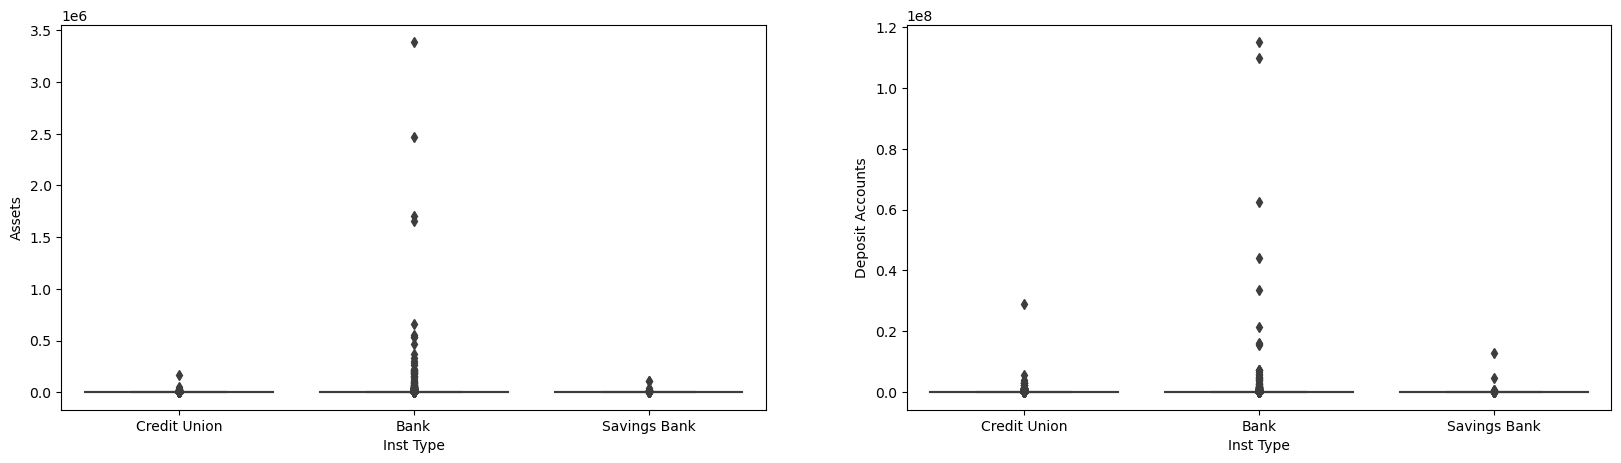

In [290]:
#Quick boxplot to see general distribution of data across the asset category
fig, axes = plt.subplots(1, 2, figsize = (20, 5))

sns.boxplot(data = FIData, y = 'Assets', x = 'Inst Type', ax = axes[0])

sns.boxplot(data = FIData, y = 'Deposit Accounts', x = 'Inst Type', ax = axes[1])

### Data Cleaning
Based on our findings in the initial overview, it is apparent that some data cleaning is needed to prepare this dataset for further analysis. Significant outliers exist, and several zero or missing values are also present in the dataset. All of these issues need to be taken care of before we can do more.

In [291]:
#Remove records that have zero or less than zero in fields where it doesn't make sense to have those results
RemoveRecs = FIData[(FIData['Assets'] <= 0) | (FIData['Cash & Deposits'] < 0) | (FIData['Revenue'] < 0) | (FIData['Net Income'] < 0) | (FIData['Net Interest Income'] < 0) | (FIData['Non-Interest Income'] < 0)].index
FIData.drop(RemoveRecs, inplace = True)

#Drop NA records. Assume incorrect records
FIData = FIData.dropna()

#Assign significant bank outliers to 'Super Bank' inst type
FIData.loc[(FIData['Charter/Cert'] == 'Bank_628') | (FIData['Charter/Cert'] == 'Bank_3510') | (FIData['Charter/Cert'] == 'Bank_3511') | (FIData['Charter/Cert'] == 'Bank_7213'), 'Inst Type'] = 'Super Bank'

#Review our overall stats again to determine if our data is clean enough to proceed to analysis
FIDataStats = FIData.describe()
FIDataStats = FIDataStats.style.format(precision = 2, thousands = ',')
FIDataStats

,Cash & Deposits,Investments,Net Interest Income,Loans & Leases,Assets,Non-Interest Expense,Liabilities,Liabilities & Equity,Interest Income,Non-Interest Income,Net Income,Deposit Accounts,Employees,Revenue,Cash to Assets,Inv to Assets,Loans to Assets,Interest to Revenue,Non-Interest to Revenue,Net Income to Revenue,Return on Assets
count,"7,552.00","7,552.00","7,552.00","7,552.00","7,552.00","7,552.00","7,552.00","7,552.00","7,552.00","7,552.00","7,552.00","7,552.00","7,552.00","7,552.00","7,552.00","7,552.00","7,552.00","7,552.00","7,552.00","7,552.00","7,552.00"
mean,374.30,728.86,74.19,"1,761.02","3,305.37",60.18,"2,989.81","3,305.37",117.84,33.48,31.12,"123,925.21",312.32,151.32,0.13,0.19,0.62,0.87,0.13,0.17,0.01
std,"8,513.84","13,922.59","1,229.63","24,969.07","58,487.41",995.50,"52,950.56","58,487.41","1,962.85",699.24,617.60,"2,150,700.00","4,753.43","2,617.28",0.15,0.16,0.17,0.14,0.14,0.16,0.03
min,0.00,0.00,0.00,0.00,6.00,0.00,1.00,6.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,8.00,10.00,2.00,45.00,84.00,2.00,75.00,84.00,3.00,0.00,0.00,"4,941.75",15.00,3.00,0.04,0.06,0.52,0.80,0.00,0.00,0.00
50%,18.00,39.00,6.00,141.00,228.00,5.00,207.00,228.00,7.00,1.00,1.00,"11,116.00",39.00,9.00,0.07,0.16,0.65,0.89,0.11,0.16,0.01
75%,44.00,118.00,16.00,446.25,657.00,13.00,600.00,657.00,22.00,4.00,5.00,"30,196.50",103.00,26.00,0.16,0.28,0.76,1.00,0.20,0.25,0.01
max,"512,606.00","750,453.00","68,735.00","1,297,087.00","3,385,581.00","56,267.00","3,067,739.00","3,385,581.00","109,567.00","45,160.00","38,886.00","114,947,358.00","226,649.00","154,727.00",0.98,0.93,1.00,1.00,1.00,1.00,2.44


### High-level Analysis
Now that our dataset is clean, let's run an initial analysis and conduct a high-level overview. We'll do this via calculations, metrics, and visualizations.

In [292]:
#Pivot table analysis of metric fields, CU vs bank
MetricPivot = FIData.pivot_table(index = 'Inst Type', values = {'Cash to Assets', 'Inv to Assets', 'Loans to Assets', 'Interest to Revenue', 'Non-Interest to Revenue', 'Net Income to Revenue', 'Return on Assets'}, aggfunc = 'mean')
MetricPivot

,Cash to Assets,Interest to Revenue,Inv to Assets,Loans to Assets,Net Income to Revenue,Non-Interest to Revenue,Return on Assets
Inst Type,,,,,,,
Bank,0.081361,0.898056,0.233097,0.624273,0.221202,0.101944,0.009271
Credit Union,0.193872,0.837942,0.137858,0.617638,0.117384,0.162058,0.004675
Savings Bank,0.072891,0.889589,0.193294,0.672922,0.120772,0.110411,0.012044
Super Bank,0.141078,0.775167,0.245623,0.424866,0.227313,0.224833,0.009737


In [293]:
#Pivot table analysis of key financial figure fields, CU vs bank
FigurePivot = FIData.pivot_table(index = 'Inst Type', values = {'Assets', 'Cash & Deposits', 'Loans & Leases', 'Deposit Accounts'}, aggfunc = 'sum')
FigurePivot = FigurePivot.sort_values(by = 'Assets', ascending = True)
FigurePivot = FigurePivot.reset_index()
FigurePivot.style.format(precision = 0, thousands = ',')

,Inst Type,Assets,Cash & Deposits,Deposit Accounts,Loans & Leases
0,Savings Bank,"660,967","40,299","19,878,195","471,685"
1,Credit Union,"2,129,325","169,378","262,633,871","1,516,915"
2,Super Bank,"9,213,078","1,313,991","303,170,841","3,843,196"
3,Bank,"12,958,764","1,303,083","350,200,258","7,467,397"


C:\Users\chris.scholz\AppData\Local\Temp\ipykernel_24344\2944198798.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  box_plot_1.set_yticklabels(ylabels)
C:\Users\chris.scholz\AppData\Local\Temp\ipykernel_24344\2944198798.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot_1.set_yticklabels(ylabels)
C:\Users\chris.scholz\AppData\Local\Temp\ipykernel_24344\2944198798.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot_2.set_yticklabels(ylabels)
C:\Users\chris.scholz\AppData\Local\Temp\ipykernel_24344\2944198798.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  scatter_plot_1.set_yticklabels(ylabels)
C:\Users\chris.scholz\AppData\Local\Temp\ipykernel_24344\2944198798.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  scatter_plot_1.set_xticklabels(xlabels)
C:\Users\chris.scholz\AppData\Local\Temp\ipykernel_24

[Text(-50000.0, 0, '-50,000'),
 Text(0.0, 0, '0'),
 Text(50000.0, 0, '50,000'),
 Text(100000.0, 0, '100,000'),
 Text(150000.0, 0, '150,000'),
 Text(200000.0, 0, '200,000'),
 Text(250000.0, 0, '250,000'),
 Text(300000.0, 0, '300,000'),
 Text(350000.0, 0, '350,000')]

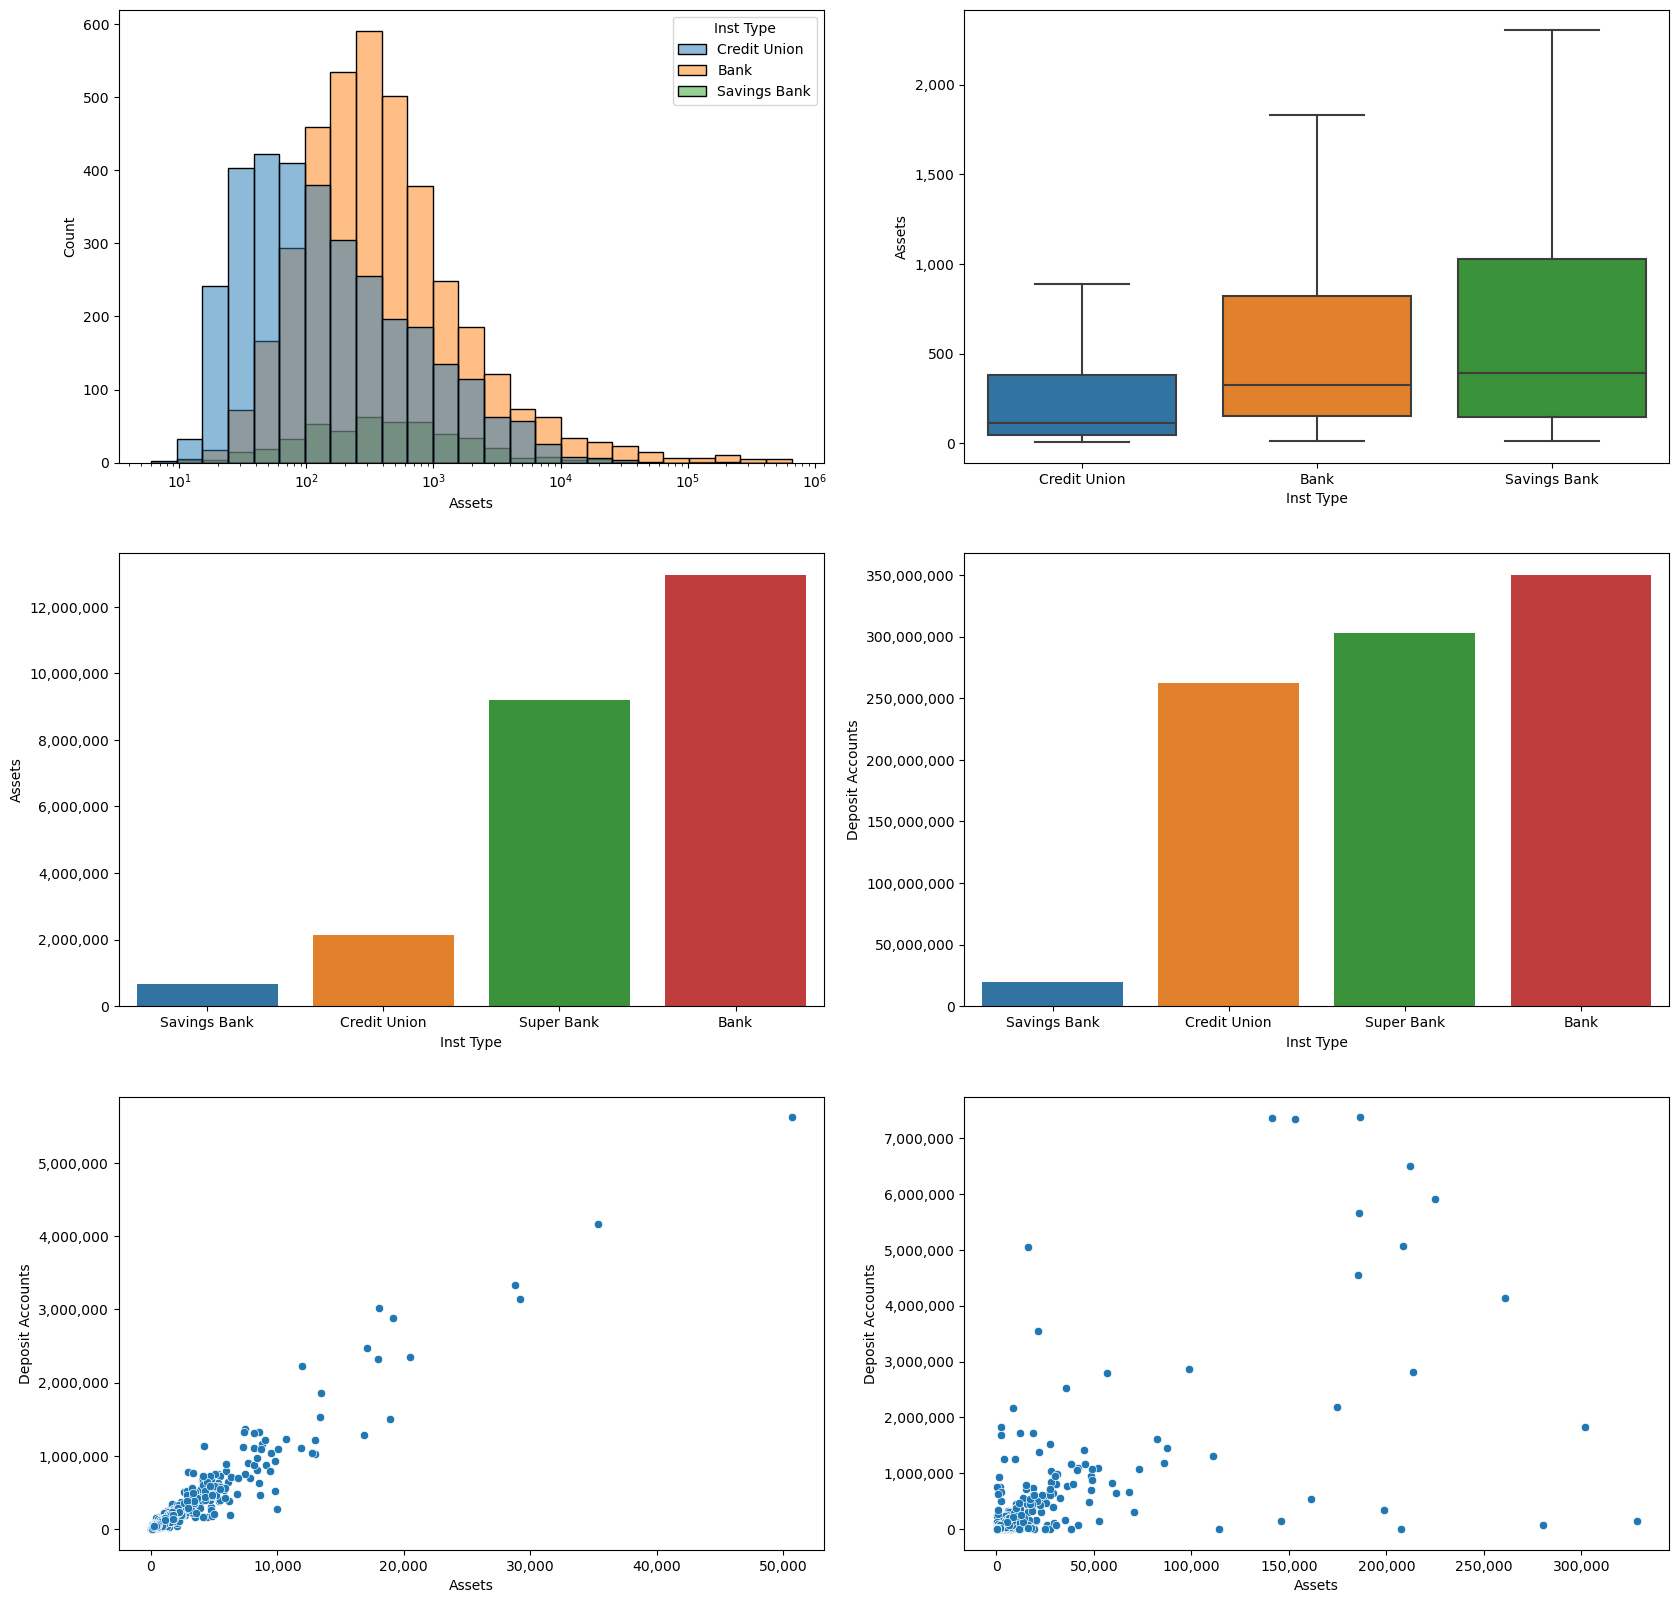

In [294]:
#Overview visuals - histograms, box plots, bar graphs, and scatterplots of fields of interest
fig, axes = plt.subplots(3, 2, figsize = (20, 20))

hist_plot_1 = sns.histplot(data = FIData[FIData['Inst Type'] != 'Super Bank'], x = 'Assets', ax = axes[0, 0], log_scale = True, bins = 25, hue = 'Inst Type')

box_plot_1 = sns.boxplot(data = FIData[FIData['Inst Type'] != 'Super Bank'], showfliers = False, y = 'Assets', x = 'Inst Type', ax = axes[0, 1])
ylabels = ['{:,.0f}'.format(x) for x in box_plot_1.get_yticks()]
box_plot_1.set_yticklabels(ylabels)

bar_plot_1 = sns.barplot(data = FigurePivot, x = 'Inst Type', y = 'Assets', estimator = 'sum', errorbar = None, ax = axes[1, 0])
ylabels = ['{:,.0f}'.format(x) for x in bar_plot_1.get_yticks()]
bar_plot_1.set_yticklabels(ylabels)

bar_plot_2 = sns.barplot(data = FigurePivot, x = 'Inst Type', y = 'Deposit Accounts', estimator = 'sum', errorbar = None, ax = axes[1, 1])
ylabels = ['{:,.0f}'.format(x) for x in bar_plot_2.get_yticks()]
bar_plot_2.set_yticklabels(ylabels)

scatter_plot_1 = sns.scatterplot(data = FIData[(FIData['Inst Type'] == 'Credit Union') & (FIData['Charter/Cert'] != 'Credit Union_5536')], x = 'Assets', y = 'Deposit Accounts', ax = axes[2, 0])
ylabels = ['{:,.0f}'.format(x) for x in scatter_plot_1.get_yticks()]
scatter_plot_1.set_yticklabels(ylabels)
xlabels = ['{:,.0f}'.format(x) for x in scatter_plot_1.get_xticks()]
scatter_plot_1.set_xticklabels(xlabels)

scatter_plot_2 = sns.scatterplot(data = FIData[(FIData['Inst Type'] == 'Bank') & (FIData['Assets'] <= 350000)], x = 'Assets', y = 'Deposit Accounts', ax = axes[2, 1])
ylabels = ['{:,.0f}'.format(x) for x in scatter_plot_2.get_yticks()]
scatter_plot_2.set_yticklabels(ylabels)
xlabels = ['{:,.0f}'.format(x) for x in scatter_plot_2.get_xticks()]
scatter_plot_2.set_xticklabels(xlabels)

### Observations from Overall Analysis

* There is significant variation across most figures and metrics in this dataset
* Institution types do seem to have differences - i.e. cash as compared to total assets differs between types
* From an asset size perspective, each institution type appears to have a somewhat normal distribution, but the scale between types is significant. Banks control nearly six times the assets of Credit Unions, and Super Banks control more than a third of all assets combined.
* Credit Unions appear to be the most conservative with their investments and lending, with Banks lending out and investing their cash at a higher rate than Credit Unions

### Step 3:  Identify 3 research questions and perform analysis

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well.

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.

Some points to note :
1. Make sure that the 3 questions are distinct in terms of the kind of insight provided. For eg. avoid having 3 questions for correlation that only differ by the fields used.
2. You can reach out to the professor or TA to seek feedback on your questions.



In [295]:
#OVERVIEW YOUR QUESTION AND PERFORM YOUR ANALYSIS IN THIS SECTION

## Research Questions

After analyzing our dataset, let's identify 3 research questions to further explore and experiment with.

**1. Do any of the metric fields have strong correlations with our 'Net Income to Revenue' metric? In other words, do any of the financial metrics have a stronger correlation to Net Income than the others?**
* We will run a correlation analysis to explore further

**2. Does our selection of metrics and financial data allow for an intelligent categorization that could be used to bucket institutions into certain useful groups/classifications?**
* We will build a machine learning clustering model to attempt create an intelligent categorization methodology

**3. Do our metrics differ between insitution types? Could we use the metrics alone to determine institution type? If so, which metrics more strongly correlate with determining institution type?**
* We will build a machine learning classification model to attempt to classify institution type based on financial metrics alone.

### #1 - Net Income Correlation Analysis
Let's see if any of our financial metrics correlate to our net income metric

In [296]:
#Run net income to revenue correlation analysis
FIData_Corr = FIData[['Cash to Assets', 'Inv to Assets', 'Loans to Assets', 'Interest to Revenue', 'Non-Interest to Revenue', 'Net Income to Revenue', 'Return on Assets']].corr()
FIData_Corr = FIData_Corr[['Net Income to Revenue']]
FIData_Corr = FIData_Corr.sort_values(by = 'Net Income to Revenue', ascending = False)
FIData_Corr = FIData_Corr.drop(index = 'Net Income to Revenue')
FIData_Corr = FIData_Corr.reset_index()
FIData_Corr = FIData_Corr.rename(columns = {'index' : 'Metric', 'Net Income to Revenue' : 'Net Income Correlation'})
FIData_Corr

,Metric,Net Income Correlation
0,Return on Assets,0.239133
1,Inv to Assets,0.102192
2,Non-Interest to Revenue,0.050806
3,Loans to Assets,-0.029310
4,Interest to Revenue,-0.050806
5,Cash to Assets,-0.079100


Interesting! It appears that there is no strong correlation to net income amongst any of our metrics!
Let's run some scatter plot visuals on the strongest correlation (return on assets), to confirm visually that no strong correlation exists.

<Axes: xlabel='Net Income to Revenue', ylabel='Return on Assets'>

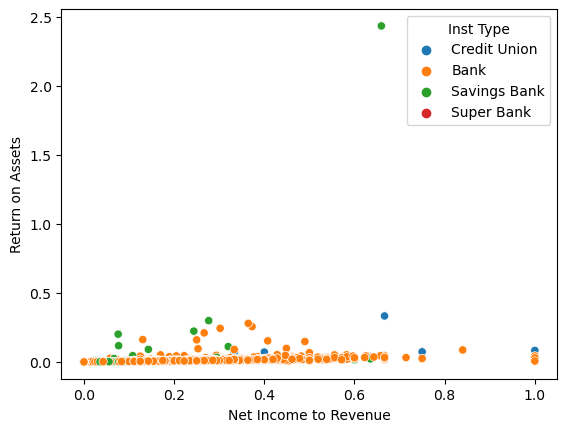

In [297]:
#Run scatterplot on the net income ratio to return on assets ratio
sns.scatterplot(data = FIData, x = 'Net Income to Revenue', y = 'Return on Assets', hue = 'Inst Type')

<Axes: xlabel='Net Income to Revenue', ylabel='Return on Assets'>

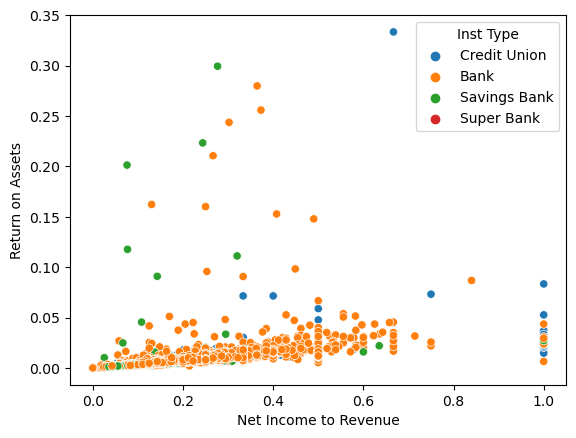

In [298]:
#Let's remove from our visual that single Savings Bank outlier with an exceptionally high return on assets. This will make the visual more usable.
sns.scatterplot(data = FIData[FIData['Charter/Cert'] != 'Savings Bank_33831'], x = 'Net Income to Revenue', y = 'Return on Assets', hue = 'Inst Type')

### #1 - Result
We can confirm that no strong correlation exists between any of our financial metrics and our net income ratio. The return on asset metric is the closest, and a visual scatterplot analysis shows that while there does seem to be a slight relationship between the two variables, there is also significant data showing no correlation exists. This is unexpected as we would assume many if not most of these ratios would correlate to net income!

Further analysis, exploration, and data cleansing could prove helpful in understanding this more, but we'll leave this one here and move on.

### #2 - Asset and Deposit Accounts Clustering Analysis
Let's see if we can produce usable categorization of financial institution asset size and number of deposit accounts using a kmeans clustering model

In [378]:
#Set up initial clustering model
kmeans = KMeans(n_clusters = 6, random_state = 0, n_init = 'auto')

In [379]:
#Trim data to only include fields for cluster analysis - Assets and Deposit Accounts. We will also remove Super Banks as they are already categorized well enough and will throw off our model.
ClusterData = FIData[FIData['Inst Type'] != 'Super Bank'][['Assets', 'Deposit Accounts']]

In [381]:
#Fit and clustering model with the cluster data, and predict the clusters
y_kmeans = kmeans.fit_predict(ClusterData)

In [382]:
#Review cluster center points that were created
print(kmeans.cluster_centers_)

[[8.85623005e+02 2.94007715e+04]
 [4.84788667e+05 1.77269593e+07]
 [4.31457000e+05 3.55124727e+07]
 [1.78836214e+05 5.53852800e+06]
 [1.57565690e+04 7.03825247e+05]
 [5.05695200e+04 2.30043156e+06]]


In [383]:
#Score the clustering analysis using a silhouette score
labels = kmeans.labels_

metrics.silhouette_score(ClusterData, labels)

0.9217119065315613

C:\Users\chris.scholz\AppData\Local\Temp\ipykernel_24344\2824278151.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  scatter_plot_cluster.set_yticklabels(ylabels)
C:\Users\chris.scholz\AppData\Local\Temp\ipykernel_24344\2824278151.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  scatter_plot_cluster.set_xticklabels(xlabels)


[Text(-100000.0, 0, '-100,000'),
 Text(0.0, 0, '0'),
 Text(100000.0, 0, '100,000'),
 Text(200000.0, 0, '200,000'),
 Text(300000.0, 0, '300,000'),
 Text(400000.0, 0, '400,000'),
 Text(500000.0, 0, '500,000'),
 Text(600000.0, 0, '600,000'),
 Text(700000.0, 0, '700,000')]

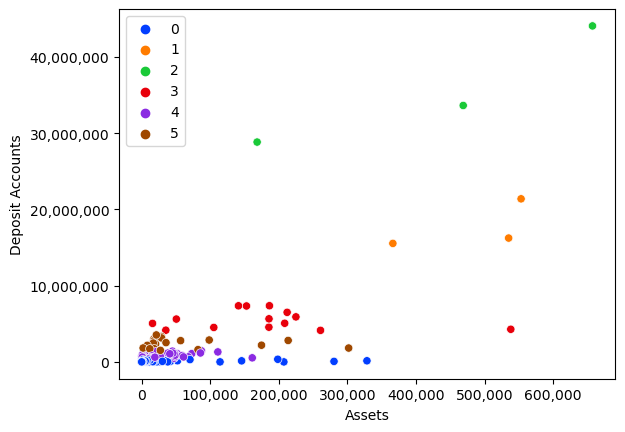

In [385]:
#Visualize our cluster analysis.
scatter_plot_cluster = sns.scatterplot(data = ClusterData, x = 'Assets', y = 'Deposit Accounts', hue = labels, palette = 'bright')
ylabels = ['{:,.0f}'.format(x) for x in scatter_plot_cluster.get_yticks()]
scatter_plot_cluster.set_yticklabels(ylabels)
xlabels = ['{:,.0f}'.format(x) for x in scatter_plot_cluster.get_xticks()]
scatter_plot_cluster.set_xticklabels(xlabels)

### #2 - Result
After training and running a k-means clustering model, we were able to intelligently classify financial institutions using asset size and the number of deposit accounts. Our model has categorized each insitution into 6 different buckets, with an overall silhouette score of 0.92 indicating relatively accurate categorization. We conclude that this experiment was a success and that we can use clustering analysis to produce valuable insight with this dataset.

### #3 - Institution Type Classification Analysis
Let's see if we can build a random forest classification model to properly classify institution type using only the financial metrics and readings provided. In essence, this would identify if there are inherent financial differences amongst the institution types.

In [388]:
#Create our random forest classifier model
clf = RandomForestClassifier(max_depth = len(FIData.columns), random_state = 0)

In [395]:
#Split our dataset into input and target sets
X = FIData.drop(columns = ['Inst Type', 'Charter/Cert', 'Report Date', 'Inst Type Code', 'Inst Name'])
y = FIData['Inst Type']

In [396]:
#Split data further into train and test datasets. Use a test split of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [397]:
#Fit and generate predictions using our classifer model
clf.fit(X_train, y_train)

clf_pred = clf.predict(X_test)

In [399]:
#Score our predictions
accuracy_score(y_test, clf_pred)

0.9172733289212442

Interesting! It seems that given the financial data presented, our random forest model can predict with a 91.7% accuracy what type of institution it is. Now let's see what features play the biggest role in the model, thereby helping identify which financial data most helps differentiate insitution type.

[Text(0, 0, 'Non-Interest Expense'),
 Text(0, 1, 'Non-Interest Income'),
 Text(0, 2, 'Loans & Leases'),
 Text(0, 3, 'Cash & Deposits'),
 Text(0, 4, 'Revenue'),
 Text(0, 5, 'Loans to Assets'),
 Text(0, 6, 'Net Interest Income'),
 Text(0, 7, 'Net Income'),
 Text(0, 8, 'Assets'),
 Text(0, 9, 'Employees'),
 Text(0, 10, 'Liabilities & Equity'),
 Text(0, 11, 'Interest Income'),
 Text(0, 12, 'Cash to Assets'),
 Text(0, 13, 'Liabilities'),
 Text(0, 14, 'Inv to Assets'),
 Text(0, 15, 'Return on Assets'),
 Text(0, 16, 'Net Income to Revenue'),
 Text(0, 17, 'Non-Interest to Revenue'),
 Text(0, 18, 'Investments'),
 Text(0, 19, 'Interest to Revenue'),
 Text(0, 20, 'Deposit Accounts')]

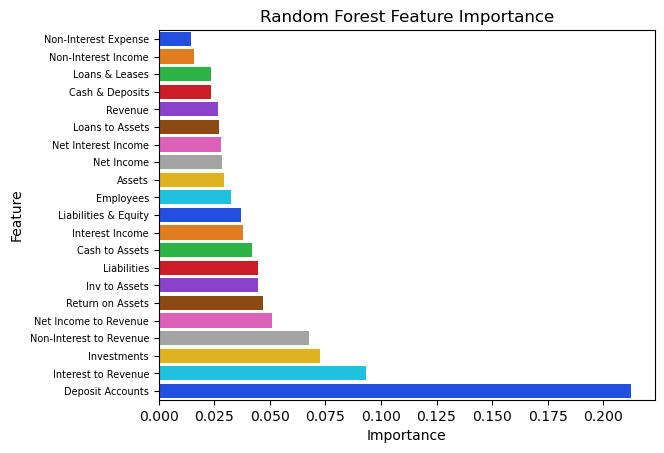

In [403]:
#Define and visualize our feature importance
feat_names = clf.feature_names_in_
feat_importances = clf.feature_importances_

features_df = pd.DataFrame({'feat_names' : feat_names, 'feat_imp' : feat_importances})
features_df = features_df.sort_values(by = 'feat_imp', ascending = True)

bar_plot_clf = sns.barplot(data = features_df, x = 'feat_imp', y = 'feat_names', palette = 'bright')
bar_plot_clf.set(title = 'Random Forest Feature Importance', ylabel = 'Feature', xlabel = 'Importance')
bar_plot_clf.set_yticklabels(bar_plot_clf.get_yticklabels(), size = 7)

### #3 - Result
After training a random forest classifier model on our financial data, with the institution type as our target, we've found that we can predict insitution type with a 92% success rate based on the financial data of the institution alone. Reviewing our feature importance shows that number of deposit accounts plays the biggest factor in our classifer model, with interest as a % of revenue, investments, and non-interest as a % of revenue also featuring some level of enhanced significance. We conclude that this experiment was a success and that we can classify institution types using only reported financial data.

### Step 4:  Present your findings

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?

This includes following all best practices for presenting your findings that you learnt during the mini-project. The report should be easy to read and inmportant points and explanations clearly highlighted.

__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


## Findings

In [302]:
#EXPAND THIS SECTION TO PRESENT YOUR FINDINGS

### Overall Analysis
Overall, we can see that first and foremost that this is a diverse dataset. Financial institutions differ widely in size and financial metrics. That being said, there are clearly some differences across institution types and sizes.

Credit unions across the board seem to be more conservative with cash, which isn't suprising as this would be the assumption. Banks, on the other hand, generally are more aggressive with lending and investing cash. Surprisingly, Savings Banks appeared to carry the least amount of cash as compared to their total asset balances.

A key observation is the range of size differences across all institutions. While each institution type appears to have a normal distribution across asset size categories, the differences in scale are vast. The 4 super banks alone tally more than a third of all assets combined!

### Research Questions

**1. Net Income Correlation Analysis**
* This was perhaps our most unexpected result, as our analysis showed **no** strong correlation between any of our metrics and net income. This was counter to what we would have assumed. More analysis would be needed to conclusively state the reason, but for now we conclude that there is no correlation between the metrics and net income.

**2. Asset and Deposit Accounts Clustering Analysis**
* After training and running a k-means clustering analysis model, we were able to create a classification system to categorize institutions based on both their asset size and number of deposit accounts simultaneously. This segmentation could prove useful in many real-world applications. We conclude that this experiement was a success.

**3. Institution Type Classification Analysis**
* After training and running a random forest classifer model, we were able to predict institution type using only the given financial data with a ~92% accuracy. This means that credit unions, banks, and savings banks are inherently different from a financial lense. Interestingly, our most significant features were number of deposit accounts and interest as a % of total revenue. We conclude that this experiment was also a success.

# 2. Video

Make a video where you go over each part of the report speaking about the steps you undertook and explaining your work, reasonings, insights and highlighting the important points of the project. You do not need to explain the lines of code (unless you feel it is required).

1. The video should be more than 5 minutes and strictly less than 10 minutes.
2. Both audio and video is required.
3. You can use the zoom to record the video. Start a meeting, start video, start recording and share screen.
4. Make sure your audio is clear before uploading the video to the gradescope.
